## IMPORT LIBRARIES

In [1]:
# data wrangling 

import pandas as pd
import numpy as np
import re

# data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# filter warning

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=FutureWarning)

## OVERVIEW

In [2]:
# load all data

df1 = pd.read_csv('data_param_label_suhu_td.csv').drop(columns = ['Unnamed: 0', 'petir', 'hujan 6 jam'])
df2 = pd.read_csv('param_label_hujan_2019.csv').drop(columns = ['Unnamed: 0'])

In [3]:
# concat all data 

df = pd.concat([df1, df2], ignore_index=True)

In [4]:
# changing dataframe columns

col_name = []
for i in df.columns.tolist():
    col = i.replace('suhu', 'temp').replace(' ', '_').lower()
    col_name.append(col)
    
df.columns = col_name

In [5]:
# rearrange dataframe columns

df.rename(columns={'waktu' : 'time', 'hujan' : 'rain'}, inplace = True)

df = df[['convective_available_potential_energy', 'k_index', 'cross_totals_index',
         'vertical_totals_index', 'lifted_index', 'showalter_index', 'temp_1000_hpa', 
         'dewpoint_1000_hpa', 'temp_850_hpa', 'dewpoint_850_hpa', 'temp_700_hpa', 'dewpoint_700_hpa', 
         'temp_500_hpa', 'dewpoint_500_hpa', 'time', 'rain']]

In [6]:
# show top 5

df.head()

,convective_available_potential_energy,k_index,cross_totals_index,vertical_totals_index,lifted_index,showalter_index,temp_1000_hpa,dewpoint_1000_hpa,temp_850_hpa,dewpoint_850_hpa,temp_700_hpa,dewpoint_700_hpa,temp_500_hpa,dewpoint_500_hpa,time,rain
0,508.22,35.4,20.1,22.9,-1.48,0.16,27.0,22.2,18.6,15.8,10.2,6.9,-4.3,11.3,2016-01-01 00:00:00,0.0
1,508.22,35.4,20.1,22.9,-1.48,0.16,27.0,22.2,18.6,15.8,10.2,6.9,-4.3,11.3,2016-01-01 12:00:00,0.0
2,952.96,32.2,19.2,22.1,-2.35,1.33,26.2,23.5,18.0,15.1,11.0,6.0,-4.1,26.1,2016-01-02 00:00:00,0.0
3,952.96,32.2,19.2,22.1,-2.35,1.33,26.2,23.5,18.0,15.1,11.0,6.0,-4.1,26.1,2016-01-02 12:00:00,0.0
4,276.15,33.7,17.1,23.1,-0.87,2.82,26.2,22.1,19.0,13.0,9.0,6.6,-4.1,34.1,2016-01-03 00:00:00,0.0


In [7]:
# check info on initial data

pd.DataFrame({'Features' : df.columns, 'dataType' : df.dtypes.values, 
              'nullvalues' : [df[i].isna().sum() for i in df.columns],
              'unique' : [df[i].nunique() for i in df.columns],
              'uniqueSample' : [list(pd.Series(df[i].unique()).sample()) for i in df.columns]}).reset_index(drop = True)

,Features,dataType,nullvalues,unique,uniqueSample
0,convective_available_potential_energy,float64,108,1072,[662.89]
1,k_index,float64,132,309,[-5.9]
2,cross_totals_index,float64,132,139,[17.8]
3,vertical_totals_index,float64,132,45,[26.3]
4,lifted_index,float64,132,664,[-2.78]
5,showalter_index,float64,132,668,[4.68]
6,temp_1000_hpa,float64,112,35,[22.8]
7,dewpoint_1000_hpa,float64,112,97,[18.4]
8,temp_850_hpa,float64,112,34,[20.2]
9,dewpoint_850_hpa,float64,112,135,[12.5]


In [8]:
# drop all missing values

df = df.dropna()

In [9]:
# change datatype

for i in df[['time','rain']]:
    if i == 'time':
        df[i] = pd.to_datetime(df[i])
    else :
        df[i] = df[i].replace({0.0 : 'No', 1.0 : 'Yes'}).astype(np.object)

In [10]:
# check info on cleaned data

pd.DataFrame({'Features' : df.columns, 'dataType' : df.dtypes.values, 
              'nullvalues' : [df[i].isna().sum() for i in df.columns],
              'unique' : [df[i].nunique() for i in df.columns],
              'uniqueSample' : [list(pd.Series(df[i].unique()).sample()) for i in df.columns]}).reset_index(drop = True)

,Features,dataType,nullvalues,unique,uniqueSample
0,convective_available_potential_energy,float64,0,967,[32.06]
1,k_index,float64,0,303,[1.5]
2,cross_totals_index,float64,0,135,[10.5]
3,vertical_totals_index,float64,0,42,[21.1]
4,lifted_index,float64,0,644,[1.03]
5,showalter_index,float64,0,645,[2.89]
6,temp_1000_hpa,float64,0,34,[28.0]
7,dewpoint_1000_hpa,float64,0,95,[16.2]
8,temp_850_hpa,float64,0,33,[17.8]
9,dewpoint_850_hpa,float64,0,135,[7.4]


In [11]:
# show cleaned data

df.head()

,convective_available_potential_energy,k_index,cross_totals_index,vertical_totals_index,lifted_index,showalter_index,temp_1000_hpa,dewpoint_1000_hpa,temp_850_hpa,dewpoint_850_hpa,temp_700_hpa,dewpoint_700_hpa,temp_500_hpa,dewpoint_500_hpa,time,rain
0,508.22,35.4,20.1,22.9,-1.48,0.16,27.0,22.2,18.6,15.8,10.2,6.9,-4.3,11.3,2016-01-01 00:00:00,No
1,508.22,35.4,20.1,22.9,-1.48,0.16,27.0,22.2,18.6,15.8,10.2,6.9,-4.3,11.3,2016-01-01 12:00:00,No
2,952.96,32.2,19.2,22.1,-2.35,1.33,26.2,23.5,18.0,15.1,11.0,6.0,-4.1,26.1,2016-01-02 00:00:00,No
3,952.96,32.2,19.2,22.1,-2.35,1.33,26.2,23.5,18.0,15.1,11.0,6.0,-4.1,26.1,2016-01-02 12:00:00,No
4,276.15,33.7,17.1,23.1,-0.87,2.82,26.2,22.1,19.0,13.0,9.0,6.6,-4.1,34.1,2016-01-03 00:00:00,No


In [12]:
# check descriptive analysis

df.describe().T

,count,mean,std,min,25%,50%,75%,max
convective_available_potential_energy,2544.0,233.733518,326.936462,0.00,0.1800,97.27,352.390,3419.86
k_index,2544.0,27.668947,9.859713,-19.70,24.3000,31.10,34.300,41.70
cross_totals_index,2544.0,17.791038,3.781396,-6.30,16.7000,18.80,20.200,24.50
vertical_totals_index,2544.0,23.475865,1.211778,19.10,22.7000,23.30,24.100,27.90
lifted_index,2544.0,-0.083581,2.533075,-29.26,-1.7025,-0.61,1.070,12.48
showalter_index,2544.0,2.281116,2.862454,-3.79,0.3400,1.54,3.300,15.52
temp_1000_hpa,2544.0,25.772248,1.031566,21.80,25.2000,26.00,26.400,28.60
dewpoint_1000_hpa,2544.0,20.445165,2.332755,3.40,19.4000,21.00,22.000,26.30
temp_850_hpa,2544.0,18.185849,0.943694,14.40,17.6000,18.20,18.800,21.20
dewpoint_850_hpa,2544.0,12.533726,3.732652,-9.00,11.4000,13.60,14.900,17.80


## DATA VISUALIZATION

In [13]:
# set visual style

plt.style.use('ggplot')

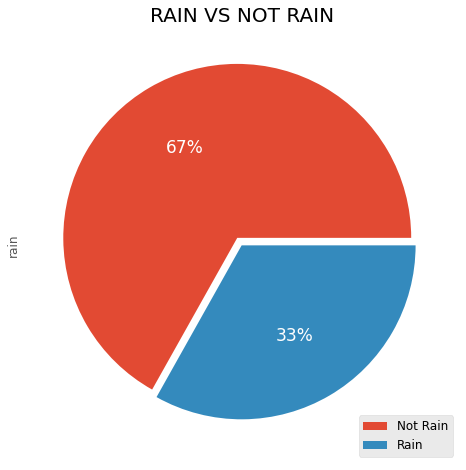

In [14]:
# show visualization on target feature

plt.figure(figsize=(8,8))
plt.title('RAIN VS NOT RAIN', fontsize=20)
labels = 'Not Rain', 'Rain'
df['rain'].value_counts().plot(kind='pie', autopct='%0.0f%%', textprops={'fontsize':17, 'color':'white'}, explode = (0.05,0))
plt.legend(labels, loc='lower right', fontsize=12)
plt.show()

In [15]:
df['rain'].value_counts()

No     1701
Yes     843
Name: rain, dtype: int64

In [32]:
df['rain'].astype

0       0
1       0
2       0
3       0
4       0
       ..
2917    0
2918    0
2919    1
2920    0
2921    1
Name: rain, Length: 2544, dtype: int64

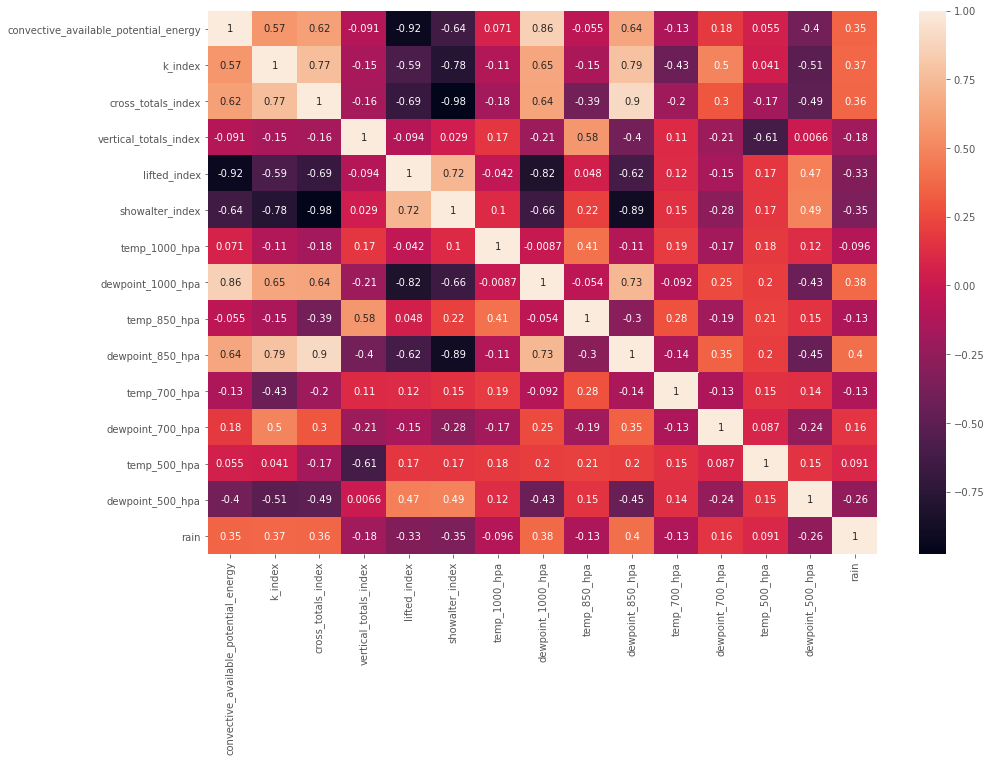

In [33]:
# show visualization with pairplot

plt.figure(figsize=(15,10))
sns.heatmap(df.drop(columns=['time']).corr('spearman'), annot = True)
plt.show()

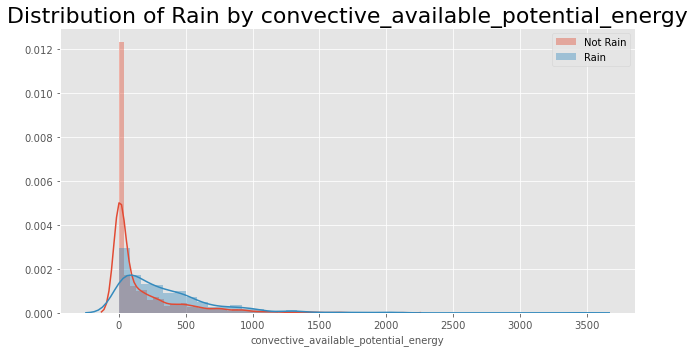

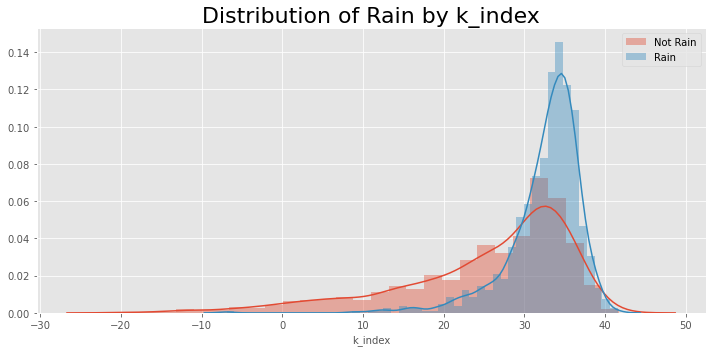

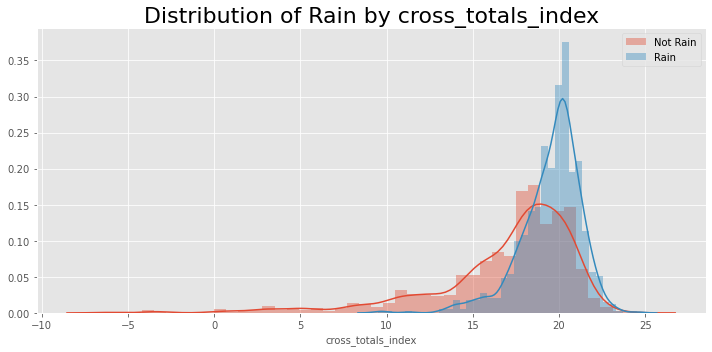

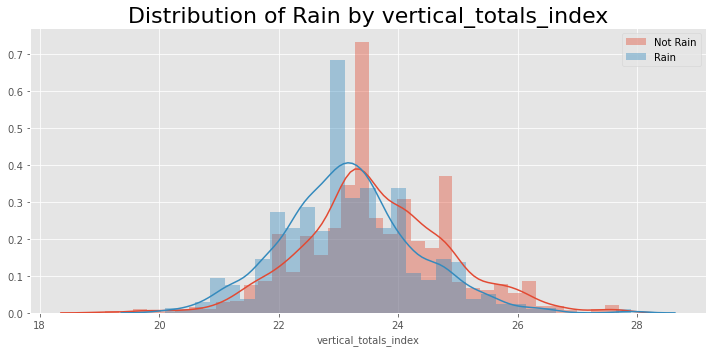

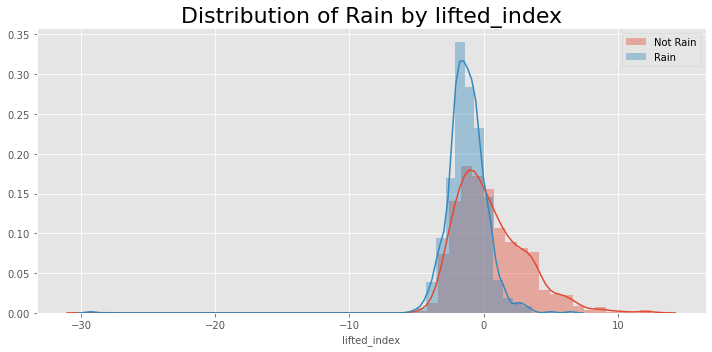

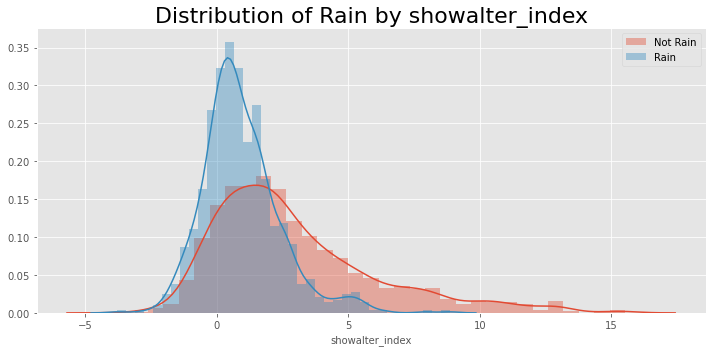

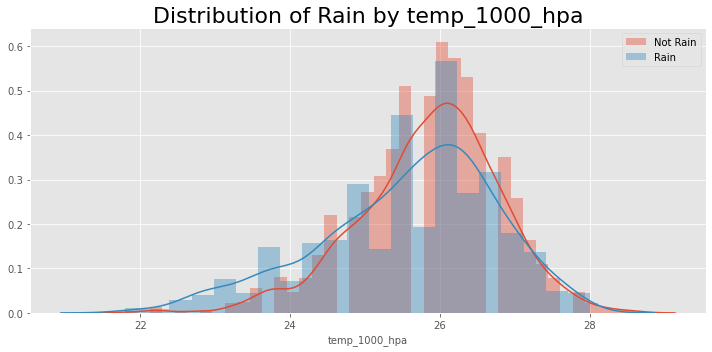

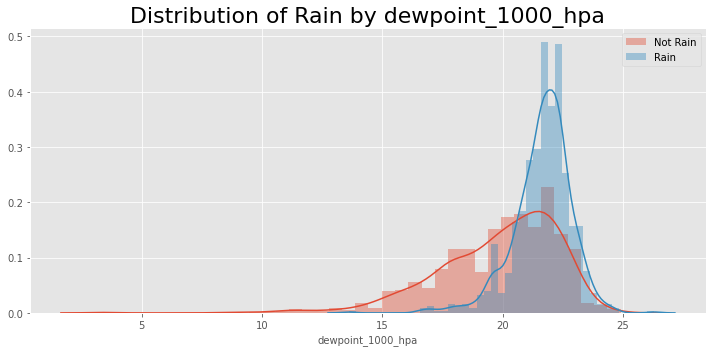

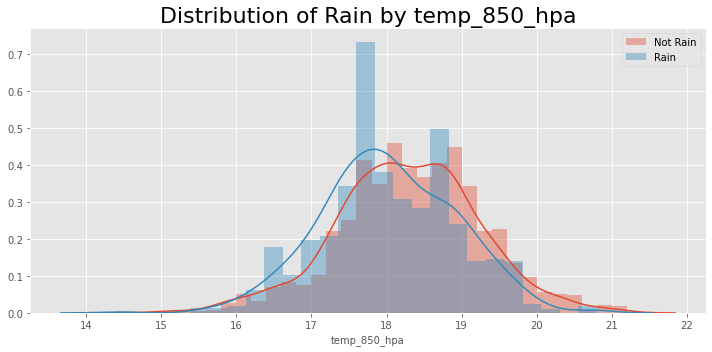

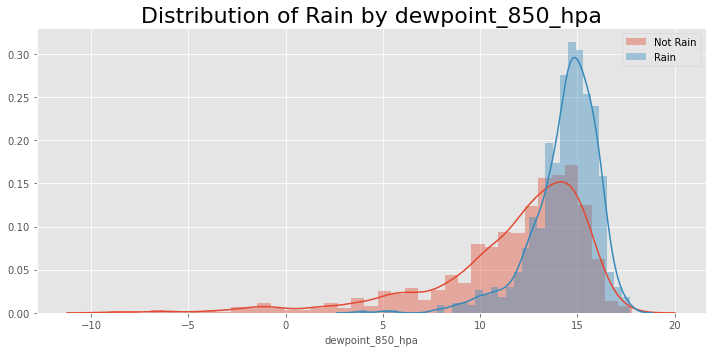

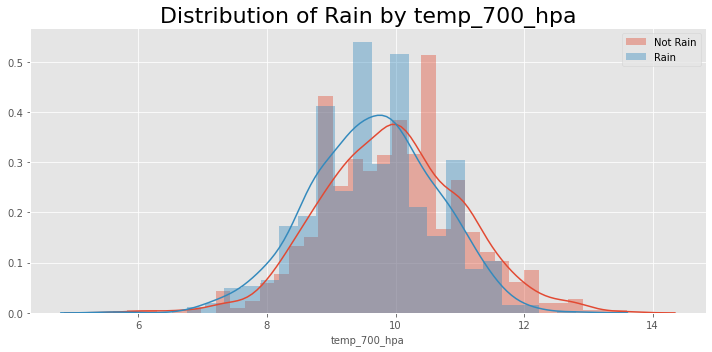

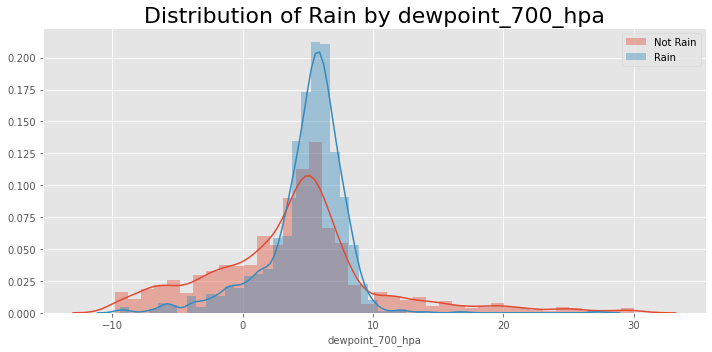

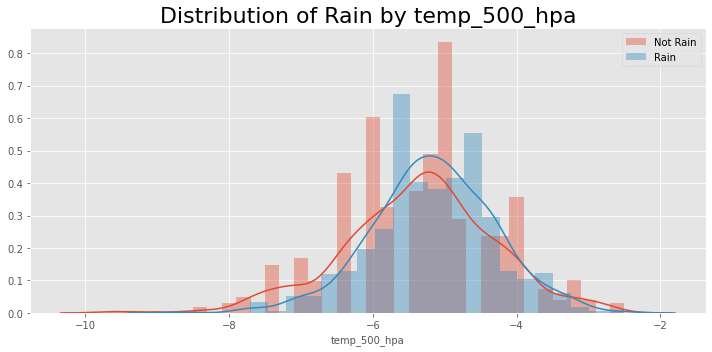

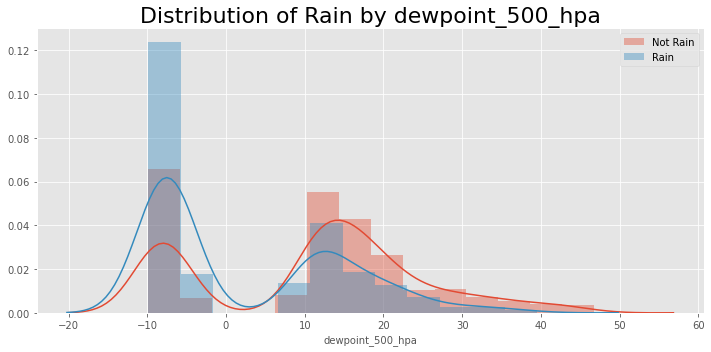

In [18]:
# show visualization on target distribution  

for i in df.drop(columns=['rain', 'time']):
    plt.figure(figsize = (10,5))
    ax = sns.distplot(df[(df['rain'] == 'No')][i])
    ax = sns.distplot(df[(df['rain'] == 'Yes')][i])
    ax.legend(['Not Rain', 'Rain'])
    plt.xlabel(i, fontsize = 10)
    plt.title('Distribution of Rain by ' + i, fontsize = 22)
    plt.tight_layout()
    plt.show()

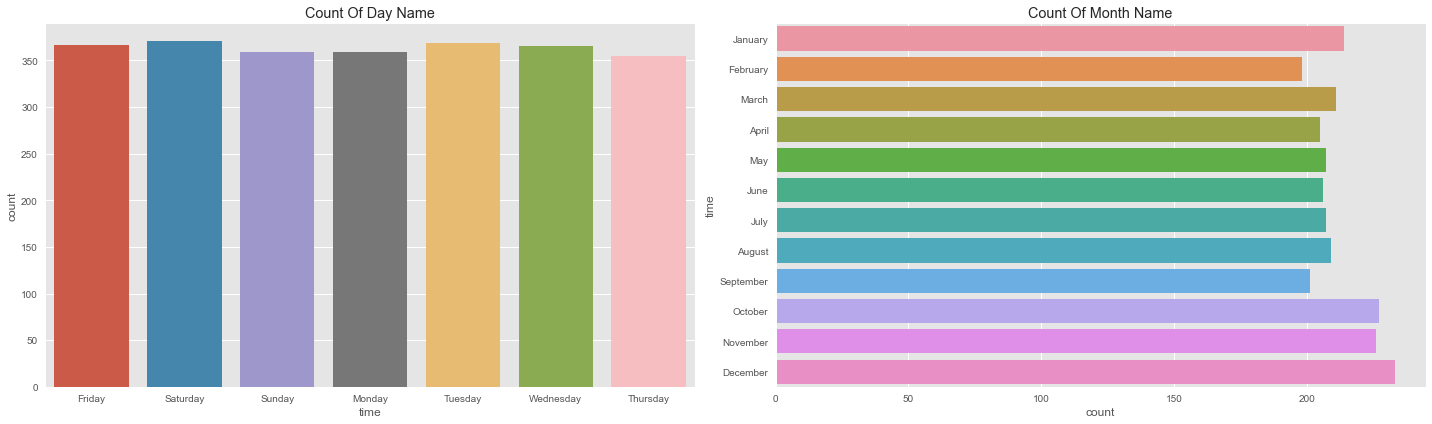

In [17]:
# show visualization of datetime feature

time = df['time']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
sns.countplot(time.dt.day_name(), ax=ax1).title.set_text('Count Of Day Name')
sns.countplot(y = time.dt.month_name(), ax=ax2).title.set_text('Count Of Month Name')
plt.tight_layout()
plt.show()